/tmp/ipykernel_6460/2715889953.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df.applymap(lambda x: 1 if x >= 1 else 0)


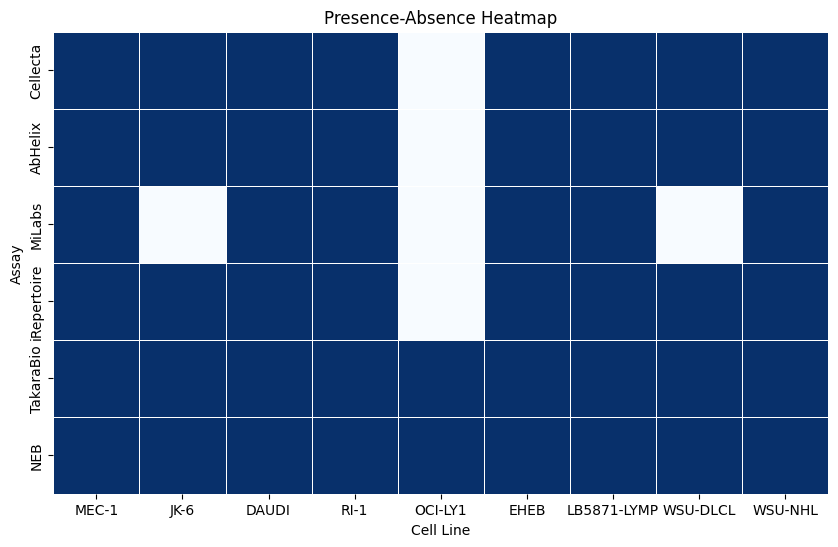

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame
data = {
    "25ng": ["Cellecta", "AbHelix", "MiLabs", "iRepertoire", "TakaraBio", "NEB"],
    "MEC-1": [1, 1, 1, 1, 1, 1],
    "JK-6": [1, 1, 0, 1, 1, 1],
    "DAUDI": [1, 1, 1, 1, 1, 1],
    "RI-1": [1, 1, 1, 1, 1, 1],
    "OCI-LY1": [0.5, 0, 0, 0, 1, 1],
    "EHEB": [1, 1, 1, 1, 1, 1],
    "LB5871-LYMP": [1, 1, 1, 1, 1, 1],
    "WSU-DLCL": [1, 1, 0, 1, 1, 1],
    "WSU-NHL": [1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.set_index("25ng", inplace=True)

# Converting all values to presence (1) or absence (0)
df_binary = df.applymap(lambda x: 1 if x >= 1 else 0)

# Plot heatmap with blue color instead of black
plt.figure(figsize=(10, 6))
sns.heatmap(df_binary, cmap="Blues", cbar=False, linewidths=0.5, linecolor="White", annot=False)
plt.xlabel("Cell Line")
plt.ylabel("Assay")
plt.title("Presence-Absence Heatmap")

# Show plot
plt.show()


/tmp/ipykernel_730/1773682126.py:50: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_730/1773682126.py:51: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig("assay_cell_line_support_matrix.svg", dpi=300)
/tmp/ipykernel_730/1773682126.py:52: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig("assay_cell_line_support_matrix.pdf")
/tmp/ipykernel_730/1773682126.py:52: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig("assay_cell_line_support_matrix.pdf")
/tmp/ipykernel_730/1773682126.py:53: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig("assay_cell_line_support_matrix.png")
/home/rittika/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

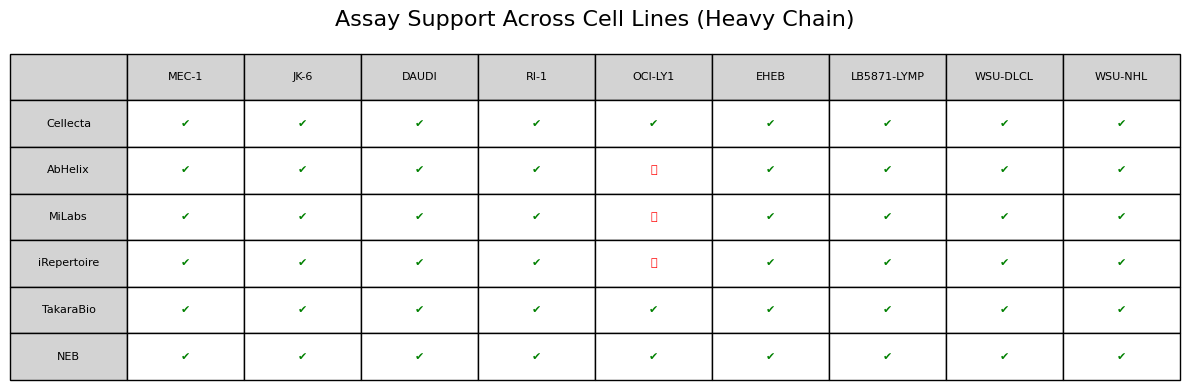

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.table import Table

# Define the data
data = {
    "MEC-1":        [1, 1, 1, 1, 1, 1],
    "JK-6":         [1, 1, 1, 1, 1, 1],
    "DAUDI":        [1, 1, 1, 1, 1, 1],
    "RI-1":         [1, 1, 1, 1, 1, 1],
    "OCI-LY1":      [1, 0, 0, 0, 1, 1],
    "EHEB":         [1, 1, 1, 1, 1, 1],
    "LB5871-LYMP":  [1, 1, 1, 1, 1, 1],
    "WSU-DLCL":     [1, 1, 1, 1, 1, 1],
    "WSU-NHL":      [1, 1, 1, 1, 1, 1],
}
assays = ["Cellecta", "AbHelix", "MiLabs", "iRepertoire", "TakaraBio", "NEB"]

# Create the DataFrame
df = pd.DataFrame(data, index=assays)

# Plotting parameters
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_axis_off()
tbl = Table(ax, bbox=[0, 0, 1, 1])

# Cell dimensions
n_rows, n_cols = df.shape
width, height = 1.0 / (n_cols + 1), 1.0 / (n_rows + 1)

# Header row
tbl.add_cell(0, 0, width, height, text="", loc='center', facecolor='lightgray')
for j, col in enumerate(df.columns):
    tbl.add_cell(0, j + 1, width, height, text=col, loc='center', facecolor='lightgray')

# First column (assays) and data cells
for i, assay in enumerate(df.index):
    tbl.add_cell(i + 1, 0, width, height, text=assay, loc='center', facecolor='lightgray')
    for j, col in enumerate(df.columns):
        val = df.loc[assay, col]
        symbol = '✔️' if val == 1 else '❌'
        color = 'green' if val == 1 else 'red'
        cell = tbl.add_cell(i + 1, j + 1, width, height, text=symbol, loc='center', facecolor='white')
        cell.get_text().set_color(color)
        cell.get_text().set_fontsize(14)

# Add the table to the axis
ax.add_table(tbl)
plt.title("Assay Support Across Cell Lines (Heavy Chain)", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig("assay_cell_line_support_matrix.svg", dpi=300)
plt.savefig("assay_cell_line_support_matrix.pdf")
plt.savefig("assay_cell_line_support_matrix.png")
plt.show()
